<a href="https://colab.research.google.com/github/seismosmsr/machine_learning/blob/main/gedi_analysis_8_24_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
install.packages('sf')
install.packages('raster')
install.packages('exactextractr')
install.packages("googledrive")
install.packages("googletoken")
install.packages("DBI")
install.packages("RSQLite")
install.packages("RPostgreSQL")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘Rcpp’, ‘s2’, ‘units’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sp’, ‘terra’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘googletoken’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the

In [3]:
library(ggplot2)
library(sf)
library(magrittr)
library(data.table)
library(raster)
library(exactextractr)
library(googledrive)
library(DBI)

Linking to GEOS 3.10.2, GDAL 3.4.3, PROJ 8.2.1; sf_use_s2() is TRUE

Loading required package: sp

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)



In [ ]:
# while(TRUE){}

In [ ]:
# drive_deauth()
# drive_auth(use_oob = TRUE, cache = FALSE)

In [ ]:
# GEDI data
# https://drive.google.com/file/d/14jTxo28D2bsC68EpVsbSaY7SpYM5MIA4/view?usp=drive_link

# Landtrendr data
# https://drive.google.com/file/d/1FrN1tUojGV80f3kDtmezsFsvLabIoGiW/view?usp=drive_link

# HUC 8
# https://drive.google.com/file/d/1r6CIYLOy01N8B1jc7Hr8AJUkA0jPXp9z/view?usp=drive_link

# HUC 10
# https://drive.google.com/file/d/1m86VWKw3nys-oY931eq9dC6xv0cEfs4a/view?usp=drive_link

# HUC 12
# https://drive.google.com/file/d/18ayVCWhBkP1Tb_wrWgPJea8vaWEiPgOL/view?usp=drive_link

# GEDI vectorized by YOD, Queen's rule.
# https://drive.google.com/file/d/1miOMqCh081yceVUfVVOL5JtxpKUgBO-2/view?usp=drive_link

In [4]:
drive_download(file = as_id('1FrN1tUojGV80f3kDtmezsFsvLabIoGiW'), path =  '/content/HJA_LandTrendr_84_23.tif', overwrite = TRUE)

Is it OK to cache OAuth access credentials in the folder ~/.cache/gargle
between R sessions?
1: Yes
2: No


Selection: 1


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=ed760decbc0315758f4ab90701643ca4&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWRldTVCVkRZVzdmUTl1Wi1pNzFHa3FOdWFNX3RvcHM1ak1JWHJUTXU5SVZ6UWlkdHh0d1dIRDVCU1Y4c0JXRnJfUXQzQSIsInN0YXRlIjoiZWQ3NjBkZWNiYzAzMTU3NThmNGFiOTA3MDE2NDNjYTQifQ==


File downloaded:

• HJA_LandTrendr_84_23_2.tif <id: 1FrN1tUojGV80f3kDtmezsFsvLabIoGiW>

Saved locally as:

• /content/HJA_LandTrendr_84_23.tif



In [5]:
drive_download(file = as_id('14jTxo28D2bsC68EpVsbSaY7SpYM5MIA4'), path =  '/content/HJA_gedi.gpkg', overwrite = TRUE)

File downloaded:

• HJA_GEDI_4.gpkg <id: 14jTxo28D2bsC68EpVsbSaY7SpYM5MIA4>

Saved locally as:

• /content/HJA_gedi.gpkg



In [6]:
drive_download(file = as_id('1r6CIYLOy01N8B1jc7Hr8AJUkA0jPXp9z'), path =  '/content/huc_8.gpkg', overwrite = TRUE)
drive_download(file = as_id('1m86VWKw3nys-oY931eq9dC6xv0cEfs4a'), path =  '/content/huc_10.gpkg', overwrite = TRUE)
drive_download(file = as_id('18ayVCWhBkP1Tb_wrWgPJea8vaWEiPgOL'), path =  '/content/huc_12.gpkg', overwrite = TRUE)

File downloaded:

• WBDHU8.gpkg <id: 1r6CIYLOy01N8B1jc7Hr8AJUkA0jPXp9z>

Saved locally as:

• /content/huc_8.gpkg

File downloaded:

• WBDHU10.gpkg <id: 1m86VWKw3nys-oY931eq9dC6xv0cEfs4a>

Saved locally as:

• /content/huc_10.gpkg

File downloaded:

• WBDHU12.gpkg <id: 18ayVCWhBkP1Tb_wrWgPJea8vaWEiPgOL>

Saved locally as:

• /content/huc_12.gpkg



In [7]:
# https://drive.google.com/file/d/1miOMqCh081yceVUfVVOL5JtxpKUgBO-2/view?usp=drive_link
drive_download(file = as_id('1miOMqCh081yceVUfVVOL5JtxpKUgBO-2'), path =  '/content/gedi_vector.gpkg', overwrite = TRUE)

File downloaded:

• yod_vector.gpkg <id: 1miOMqCh081yceVUfVVOL5JtxpKUgBO-2>

Saved locally as:

• /content/gedi_vector.gpkg



In [8]:
landtrendr_tif <- stack('/content/HJA_LandTrendr_84_23.tif')

In [9]:
gedi_vec_gpkg <- st_read('/content/gedi_vector.gpkg') %>% st_transform(st_crs('EPSG:4326'))

Multiple layers are present in data source /content/gedi_vector.gpkg, reading layer `vectorized'.
Use `st_layers' to list all layer names and their type in a data source.
Set the `layer' argument in `st_read' to read a particular layer.


Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
“automatically selected the first layer in a data source containing more than one.”


Reading layer `vectorized' from data source `/content/gedi_vector.gpkg' using driver `GPKG'
Simple feature collection with 478987 features and 4 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -123.6643 ymin: 43.85836 xmax: -121.7595 ymax: 44.90912
Geodetic CRS:  WGS 84


In [10]:
huc_8_gpgk <- st_read('/content/huc_8.gpkg') %>% st_transform(st_crs('EPSG:4326'))
huc_10_gpgk <- st_read('/content/huc_10.gpkg')  %>% st_transform(st_crs('EPSG:4326'))
huc_12_gpgk <- st_read('/content/huc_12.gpkg')  %>% st_transform(st_crs('EPSG:4326'))

Reading layer `wbdhu8_central_oregon__wdb_oregon_state_gdb__wbdhu8' from data source `/content/huc_8.gpkg' using driver `GPKG'
Simple feature collection with 4 features and 15 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -123.6643 ymin: 43.85856 xmax: -121.7597 ymax: 44.90894
Geodetic CRS:  NAD83
Reading layer `wdb_oregon_state_gdb__wbdhu10' from data source 
  `/content/huc_10.gpkg' using driver `GPKG'
Simple feature collection with 27 features and 17 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -123.6643 ymin: 43.85856 xmax: -121.7597 ymax: 44.90894
Geodetic CRS:  NAD83
Reading layer `wdb_oregon_state_gdb__wbdhu12' from data source 
  `/content/huc_12.gpkg' using driver `GPKG'
Simple feature collection with 161 features and 20 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -123.6643 ymin: 43.85856 xmax: -121.7597 ymax: 44.90894
Geodetic CRS:  NAD83


In [11]:
# [# Install and load required packages
# # install.packages(c("sf", "DBI"))
# library(sf)
# library(DBI)

# # Read a spatial dataset (e.g., a shapefile) into R
# # dataset <- st_read("path_to_your_dataset.shp")

# # Connect to the PostgreSQL database
# conn <- RPostgreSQL::dbConnect("PostgreSQL",
#                  dbname = "jifesypi",
#                  host = "mild-williams-pear.db.elephantsql.com",
#                 #  port = "your_port",
#                  user = "jifesypi",
#                  password = "Qxds23zjkpIIU343-GGHNlxqFdD3Pdlr")

# # # Ensure the connection is PostGIS-enabled
# # if (!st_is_postgis(con)) {
# #   stop("The database is not PostGIS enabled!")
# # }

# # Upload the dataset to PostgreSQL
# # 'name' parameter determines the name of the table in the database
# st_write(gedi_sf, conn, layer = "hja_gedi", delete_layer = TRUE)

# # Close the database connection
# dbDisconnect(conn)


Simple feature collection with 1 feature and 15 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -123.1059 ymin: 43.85856 xmax: -121.768 ymax: 44.50841
Geodetic CRS:  WGS 84
  OBJECTID                                  TNMID MetaSourceID SourceDataDesc
3       75 {C19C3336-0531-43B8-8DAC-569C87D4E46C}         <NA>           <NA>
  SourceOriginator SourceFeatureID            LoadDate GNIS_ID AreaAcres
3             <NA>            <NA> 2020-03-09 18:35:53      NA  857034.9
  AreaSqKm States     HUC8     Name Shape_Length Shape_Area
3   3468.3     OR 17090004 Mckenzie      4.38408   0.390227
                            geom
3 MULTIPOLYGON (((-122.0227 4...


[1] TRUE

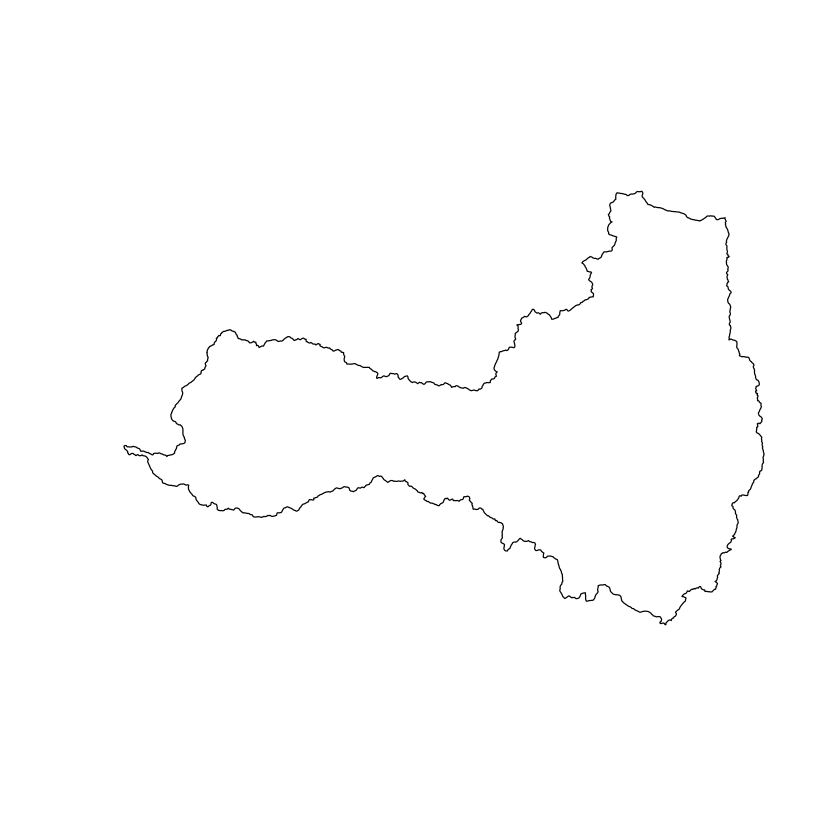

In [399]:
huc_index <- 3
plot(huc_8_gpgk[huc_index,]$geom)
print(huc_8_gpgk[huc_index,])
query_wkt <- st_as_text(huc_8_gpgk[huc_index,]$geom, crs = 4326, EWKT = TRUE)

query_sql <- paste0("SELECT * FROM hja_gedi WHERE ST_Intersects(geom,'",query_wkt,"')")
# print(query_sql)
# Connect to the PostgreSQL database
conn <- RPostgreSQL::dbConnect("PostgreSQL",
                 dbname = "jifesypi",
                 host = "mild-williams-pear.db.elephantsql.com",
                #  port = "your_port",
                 user = "jifesypi",
                 password = "Qxds23zjkpIIU343-GGHNlxqFdD3Pdlr")

gedi_sf <- st_read(conn,query=query_sql)

dbDisconnect(conn)

In [400]:
gedi_dt <- gedi_sf %>% data.table
gedi_dt %>% nrow
gedi_dt[l4_quality_flag ==1,] %>% nrow

[1] 1665759

[1] 601262

In [401]:
# landtrendr_tif[landtrendr_tif < 0] <- NA

In [402]:
gedi_dt[,geom_buffer := geom %>% st_transform('EPSG:6822') %>% st_buffer(12.5)]
#consider 12.5

In [403]:
landtrendr_rast <- terra::rast(landtrendr_tif)

extract_dt <-

gedi_dt[,geom_buffer] %>% st_as_sf %>%
exact_extract(landtrendr_rast,.,force_df=T,c('min','max','mean','median'))

Warning message in .local(x, y, ...):
“Polygons transformed to raster CRS (EPSG:NA)”
Cannot preload entire working area of 71809224 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


In [439]:
summary_dt <- data.table(gedi_dt,extract_dt[,names(extract_dt) %>% strsplit('[.]') %>% lapply(function(x){x[[1]]}) %>% unlist %>% order])

In [440]:
summary_dt$agbd[summary_dt$agbd<0] <- NA

In [441]:
delta_time_to_timestamp <- function(delta_time) {
  # Define the reference date
  reference_date <- as.POSIXct("2018-01-01 00:00:00", tz = "UTC")

  # Add the delta_time (in seconds) to the reference date
  timestamp <- reference_date + delta_time

  return(timestamp)
}

In [442]:
summary_dt$year <- delta_time_to_timestamp(summary_dt$delta_time) %>% format("%Y")

In [443]:
summary_dt[,group:=as.integer(cut((median.preval-median.mag)/median.preval, breaks = quantile((median.preval[!is.na(agbd) & median.preval > 0]-median.mag[!is.na(agbd) & median.preval > 0])/median.preval[!is.na(agbd) & median.preval > 0], probs = seq(0, 1, by = 1/3)), labels = FALSE, include.lowest = TRUE)) ]


In [444]:
year_off <- 1

agbd_preval_lm <-
summary_dt[agbd_pi_lower>0&l4_quality_flag ==1 & min.yod>1984 & round(min.yod) == (year %>% as.numeric-year_off) & round(max.yod) == (year %>% as.numeric-year_off),][,agbd_group:= round(min.preval,-1)][,agbd_group:= round(min.preval,-2)][,mag_group:= round(min.mag,-2)][,yod_group:= round(2023 - min.yod)][,list(min.preval = mean(mean.preval,na.rm=T),min.mag= mean(mean.mag,na.rm=T),agbd= mean(agbd,na.rm=T)),by=c('agbd_group','mag_group','yod_group')][,min.endval:=(min.preval-min.mag)] %>%
  lm(agbd~min.endval,.)

summary_dt$agbd_postval <- predict(agbd_preval_lm,summary_dt[,min.endval:=(min.preval-min.mag)])

summary_dt$agbd_preval <- predict(agbd_preval_lm,summary_dt[,min.endval:=(min.preval)])


In [445]:
summary_dt %>% head

agbd,lat_lowestmode,lon_lowestmode,agbd_pi_lower,agbd_pi_upper,agbd_se,agbd_t,agbd_t_se,algorithm_run_flag,channel,⋯,min.mag,min.dur,min.preval,min.rate,min.dsnr,year,group,min.endval,agbd_postval,agbd_preval
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>
NA,43.97269,-121.9533,-9999,-9999,-9999,-9999,-9999,0,0,⋯,0,0,0,0,0,2020,NA,0,15.18291,15.18291
NA,43.89442,-122.1397,-9999,-9999,-9999,-9999,-9999,0,0,⋯,0,0,0,0,0,2020,NA,0,15.18291,15.18291
NA,43.89470,-122.1391,-9999,-9999,-9999,-9999,-9999,0,0,⋯,0,0,0,0,0,2020,NA,0,15.18291,15.18291
NA,43.89497,-122.1385,-9999,-9999,-9999,-9999,-9999,0,0,⋯,0,0,0,0,0,2020,NA,0,15.18291,15.18291
NA,43.89524,-122.1379,-9999,-9999,-9999,-9999,-9999,0,0,⋯,0,0,0,0,0,2020,NA,0,15.18291,15.18291
NA,43.89552,-122.1373,-9999,-9999,-9999,-9999,-9999,0,0,⋯,0,0,0,0,0,2020,NA,0,15.18291,15.18291


In [ ]:
huc_8_int <- summary_dt %>% st_as_sf %>% st_intersects(huc_8_gpgk)

huc_10_int <- summary_dt %>% st_as_sf %>% st_intersects(huc_10_gpgk)

huc_12_int <- summary_dt %>% st_as_sf %>% st_intersects(huc_12_gpgk)

In [ ]:
huc_8_summary_dt <- data.table(summary_dt, (huc_8_gpgk %>% data.table)[,c('TNMID','HUC8','Name')][huc_8_int %>% lapply(function(x){x[1]}) %>% unlist,])
huc_10_summary_dt <- data.table(summary_dt, (huc_10_gpgk %>% data.table)[,c('TNMID','HUC10','Name')][huc_10_int %>% lapply(function(x){x[1]}) %>% unlist,])
huc_12_summary_dt <- data.table(summary_dt, (huc_12_gpgk %>% data.table)[,c('TNMID','HUC12','Name')][huc_12_int %>% lapply(function(x){x[1]}) %>% unlist,])

In [461]:
# 1:1000
resample_dt <- summary_dt

year_off <- 1

resample_dt$row_id <- 1:nrow(resample_dt)

resample_dt[,agbd := rnorm(1,agbd,agbd_se),by=row_id]

agbd_preval_lm <-
resample_dt[agbd_pi_lower>0&l4_quality_flag ==1 & min.yod>1984 & round(min.yod) == (year %>% as.numeric-year_off) & round(max.yod) == (year %>% as.numeric-year_off),][,agbd_group:= round(min.preval,-1)][,agbd_group:= round(min.preval,-2)][,mag_group:= round(min.mag,-2)][,yod_group:= round(2023 - min.yod)][,list(min.preval = mean(mean.preval,na.rm=T),min.mag= mean(mean.mag,na.rm=T),agbd= mean(agbd,na.rm=T)),by=c('agbd_group','mag_group','yod_group')][,min.endval:=(min.preval-min.mag)] %>%
  lm(agbd~min.endval,.)

resample_dt$agbd_postval <- predict(agbd_preval_lm,resample_dt[,min.endval:=(min.preval-min.mag)])

resample_dt$agbd_preval <- predict(agbd_preval_lm,resample_dt[,min.endval:=(min.preval)])

plot_dt <- resample_dt[min.yod>1984 &l4_quality_flag ==1&agbd_pi_lower>0,][,yod_round := round(mean.yod)][,list(agbd = mean(agbd,na.rm=T),agbd_preval = mean(agbd_preval,na.rm=T),agbd_postval = mean(agbd_postval,na.rm=T),yad = mean(2023-mean.yod),n = length(mean.yod)),by = .(group,yod_round)][yad>1]

# plot_dt[,intensity:= ]
plot_dt[,group_agbd_postval:=median(agbd_postval),by=group]

plot_dt[,agbd_yr:=(agbd-group_agbd_postval)/yad,by=group]

plot_dt[order(yad),agbd_yr_cumsum := cumsum(abs(agbd_yr)),by = group]

plot_dt$yad %>% min
plot_dt %>%
ggplot(aes(x=yad,y=agbd_yr_cumsum,group=group))+
geom_point()+
geom_smooth(aes(color=group))

Streaming output truncated to the last 5000 lines.
Warning message in rnorm(1, agbd, agbd_se):
“NAs produced”
Warning message in rnorm(1, agbd, agbd_se):
“NAs produced”
Warning message in rnorm(1, agbd, agbd_se):
“NAs produced”
Warning message in rnorm(1, agbd, agbd_se):
“NAs produced”
Warning message in rnorm(1, agbd, agbd_se):
“NAs produced”
Warning message in rnorm(1, agbd, agbd_se):
“NAs produced”
Warning message in rnorm(1, agbd, agbd_se):
“NAs produced”
Warning message in rnorm(1, agbd, agbd_se):
“NAs produced”
Warning message in rnorm(1, agbd, agbd_se):
“NAs produced”
Warning message in rnorm(1, agbd, agbd_se):
“NAs produced”
Warning message in rnorm(1, agbd, agbd_se):
“NAs produced”
Warning message in rnorm(1, agbd, agbd_se):
“NAs produced”
Warning message in rnorm(1, agbd, agbd_se):
“NAs produced”
Warning message in rnorm(1, agbd, agbd_se):
“NAs produced”
Warning message in rnorm(1, agbd, agbd_se):
“NAs produced”
Warning message in rnorm(1, agbd, agbd_se):
“NAs produced”
Warni

In [450]:
gedi_vec_gpkg$area <- st_area(gedi_vec_gpkg)

summary_dt$gedi_clust <- st_intersects(summary_dt$geom,gedi_vec_gpkg) %>% lapply(function(x){x[1]}) %>% unlist
summary_dt$gedi_clust_area <- gedi_vec_gpkg$area[summary_dt$gedi_clust]

In [ ]:
summary_dt[min.yod > 1984 & agbd>0 &l4_quality_flag ==1,] %>%
  ggplot(aes(y=(agbd - agbd_preval)/(2023-max.yod),x=max.yod,group=group))+
  geom_point() +
  # geom_line(aes(color=group))+
  geom_smooth(aes(color=group))

In [454]:
huc_8_int <- summary_dt %>% st_as_sf %>% st_intersects(huc_8_gpgk)

huc_10_int <- summary_dt %>% st_as_sf %>% st_intersects(huc_10_gpgk)

huc_12_int <- summary_dt %>% st_as_sf %>% st_intersects(huc_12_gpgk)

In [456]:
huc_8_summary_dt <- data.table(summary_dt, (huc_8_gpgk %>% data.table)[,c('TNMID','HUC8','Name')][huc_8_int %>% lapply(function(x){x[1]}) %>% unlist,])
huc_10_summary_dt <- data.table(summary_dt, (huc_10_gpgk %>% data.table)[,c('TNMID','HUC10','Name')][huc_10_int %>% lapply(function(x){x[1]}) %>% unlist,])
huc_12_summary_dt <- data.table(summary_dt, (huc_12_gpgk %>% data.table)[,c('TNMID','HUC12','Name')][huc_12_int %>% lapply(function(x){x[1]}) %>% unlist,])

In [ ]:
targ_dt <- huc_10_summary_dt[Name == 'Thomas Creek' & group ==1]

loess_dt <- huc_10_summary_dt[min.yod>1984 &agbd>0 ,][,yod_round := round(mean.yod)][,list(agbd = mean(agbd-agbd_preval,na.rm=T),yad = mean(2023-mean.yod),n = length(mean.yod)),by = .(group,Name,yod_round)][yad>3]

huc_10_summary_dt[,yad := 2023-mean.yod]
targ_dt$agbd_pred <-
predict(loess_dt[Name == 'Thomas Creek' & group == 1] %>%
  loess(agbd~yad,.), targ_dt)

In [ ]:
targ_dt[yad>3,] %>%
  ggplot(aes(x=agbd_pred-agbd))+
  geom_histogram(bins=100)

In [ ]:
targ_dt[yad>3,] %>% st_as_sf() %>% st_write('/content/example.gpkg')

In [ ]:
huc_10_dist_table <- huc_10_summary_dt$Name %>% table
huc_10_summary_dt <- huc_10_summary_dt[Name %in% c(huc_10_dist_table[huc_10_dist_table>100] %>% names),]

huc_10_summary_dt[,group:=as.integer(cut((median.preval-median.mag)/median.preval, breaks = quantile((median.preval[!is.na(agbd) & median.preval > 0]-median.mag[!is.na(agbd) & median.preval > 0])/median.preval[!is.na(agbd) & median.preval > 0], probs = seq(0, 1, by = 0.25)), labels = FALSE, include.lowest = TRUE)) ,by = 'Name']



fit <- loess(y ~ x)
predictions <- predict(fit, newdata = data.frame(x = x))

huc_10_summary_dt[min.yod>1984 &agbd>0 ,][,yod_round := round(mean.yod)][,list(agbd = mean(agbd-agbd_preval,na.rm=T),yad = mean(2023-mean.yod),n = length(mean.yod)),by = .(group,Name,yod_round)][yad>3] %>%
ggplot(aes(x=yad,y=(floor(agbd))/ceiling(yad),group=group))+
geom_point()+
geom_smooth(aes(color=group)) +
facet_wrap(Name~.)


In [ ]:
huc_12_dist_table <- huc_12_summary_dt$Name %>% table
huc_12_summary_dt <- huc_12_summary_dt[Name %in% c(huc_12_dist_table[huc_12_dist_table>100] %>% names),]

huc_12_summary_dt[,group:=as.integer(cut((median.preval-median.mag)/median.preval, breaks = quantile((median.preval[!is.na(agbd) & median.preval > 0]-median.mag[!is.na(agbd) & median.preval > 0])/median.preval[!is.na(agbd) & median.preval > 0], probs = seq(0, 1, by = 0.25)), labels = FALSE, include.lowest = TRUE)) ,by = 'Name']





huc_12_summary_dt[min.yod>1984 &agbd>0 ,][,yod_round := round(mean.yod)][,list(agbd = mean(agbd-agbd_preval,na.rm=T),yad = mean(2023-mean.yod),n = length(mean.yod)),by = .(group,Name,yod_round)][yad>3] %>%
ggplot(aes(x=yad,y=(floor(agbd))/ceiling(yad),group=group))+
geom_point()+
geom_smooth(aes(color=group)) +
facet_wrap(Name~.)